In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 1

In [2]:
def calculate_stay_in_the_system_probability(n):
    month_p = 1
    for i in n:
        month_p *= i
        yield month_p

renewal_rates = np.array([0.7,0.8,0.85,0.9] + [0.9 for i in range(100)])
stay_in_the_system_probability = np.array(list(calculate_stay_in_the_system_probability(renewal_rates)))
expectency_of_income_for_customer_each_monthin_dolars = stay_in_the_system_probability*10
accumulated_expectency_of_income = expectency_of_income_for_customer_each_monthin_dolars.cumsum()

[]

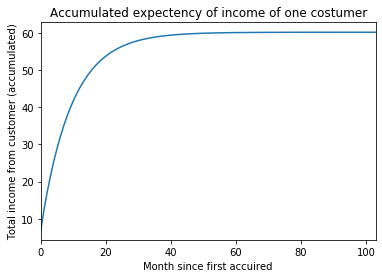

In [3]:
ax = pd.Series(accumulated_expectency_of_income).plot(title = 'Accumulated expectency of income of one costumer')
ax.set_xlabel("Month since first accuired")
ax.set_ylabel("Total income from customer (accumulated)")
plt.plot()

It is clear it's not worth to spend more than 40-60 dollars per costumer 

[]

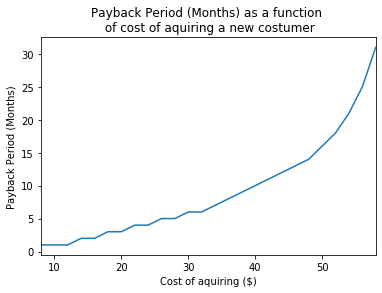

In [4]:
cost_of_acquiring  = np.arange(8,60,2)
payback_period = [np.where(accumulated_expectency_of_income >= cost)[0][0] for cost in cost_of_acquiring]
ax = pd.Series(payback_period, index = cost_of_acquiring).plot(title = 'Payback Period (Months) as a function \n of cost of aquiring a new costumer')
ax.set_xlabel("Cost of aquiring ($)")
ax.set_ylabel("Payback Period (Months)")
plt.plot()

# 1.2

In [5]:
stay_in_the_system_probability.round(2)

array([0.7 , 0.56, 0.48, 0.43, 0.39, 0.35, 0.31, 0.28, 0.25, 0.23, 0.2 ,
       0.18, 0.17, 0.15, 0.13, 0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06,
       0.06, 0.05, 0.05, 0.04, 0.04, 0.03, 0.03, 0.03, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  ])

In [6]:
accumulated_expectency_of_income[:13]

array([ 7.        , 12.6       , 17.36      , 21.644     , 25.4996    ,
       28.96964   , 32.092676  , 34.9034084 , 37.43306756, 39.7097608 ,
       41.75878472, 43.60290625, 45.26261563])



| Metric                   | Control  | Test |
|--------------------------|--------------------------|----------------------------------------------|
| Users in bucket          |         100,000  |                               100,000               |
| Monthly plan subscribers |          14,000          |                           12,705                  |
| Yearly plan subscribers  |           0               |                         1,295                     |
| Revenue per user after 13 months |              45.2           |                    50.64                          |
| Refund rate (% users asking for refunds)  |          0                |                 2.3%                         |


Assuming that the Test group will also complete the first funnel at the same rate as 14% (adding an option will not harm the willingness to pay). 
The chance of a paying costumer to stay in the system for more than 8 months is around 28%, this is the point where it is not worth to pay monthly but annualy, but the costumer itself doesn't know it. 

Assuming that a costumer knows more or less that only 28% of the population succeds the first 8 month period (we can change this assumption by simply knowing or believing that most costumers stops to use a product after a couple of months because it is hard to change and acquire new habits). assuming a rational costumer base, 28% of the costumers will choose the yearly plan. But since people are **not** rational and afraid to lose more (if I stay for one year I can save 40$ but most likely I will leave after a couple of months and loose by paying annualy) I would assume that only a third of the costumers will pay annualy in the first time. Those 0.28X0.33X14,000 = 1295

Assuming you mean that  **Revenue per user after 13 months** = **Accumulated revenue per user after 13 months**:

Since I already calculated the accumulated_expectency_of_income per user after 13 months = 45.2$, we will have 45.2 in the left cell. (Assuming that a user is a paying user , one of the 14K and not the 100K).
Let's assume that only 30% of the annualy paying users will stay in this plan and will not move to the monthly plan I choose 30 percent because for a normal user the chance to stay in the system is 17% but the annual payers are more engaged in the app (teachers and so on). So we excpect 80 + 80X0.3 total revenue per user in the 13 months period.

Let's calculate on avergae how much the revenue per user is in this plan:

In [7]:
np.round((12705/14000)*45.2 + (1295/14000)*(80+80*0.3),2)

50.64

I assume that  Refund rate (% users asking for refunds) per users in the control group is 0 since they can cancel the subscription any time by the companies policy. 

Since I assumed that around 30 percent of the people stay in the app after 13 months it is quite likely that the people who stopped using the app have done it in the begining of their subscription.
From those a sifnificat portion is lazy/un-organised/ shy or for any reason did not try ro ask a refund, so I would say that around 25% of the users annualy paying costumers asked for a refund. 

In [8]:
refund_rate = (1295*0.25)/14000
refund_rate

0.023125

# 2

In [ ]:
select team,sum(scored) as scored, sum(recieved) as recieved, sum(goal_diff) as goal_diff, sum(points) as  points
from 
        (select HomeTeam as team,HomeScore as scored,AwayScore as recieved, HomeScore - AwayScore as goal_diff,
        if(HomeScore>AwayScore,3,if(HomeScore = AwayScore,1,0)) as points

union all
        select AwayTeam as team,AwayScore as scored,HomeScore as recieved,AwayScore - HomeScore as goal_diff ,
         if(AwayScore>HomeScore,3,if(HomeScore =   AwayScore,1,0)) as points)
    
group by team
order by points desc,goal_diff desc



# 3
I'm going to use a simple linear regression to predict log of the prices.
It is possible to try many other more fency and sophisticated models like gradient boosting trees exc but it was not asked or required here. 

In [9]:
df  = pd.read_excel("Data_for_Question_3.xlsx", usecols = [1,2,3,4])
df.head(2)

,Square Meters,Floor,Years since renovation,Price sold
0,181,26,7,2121126
1,137,10,9,988448


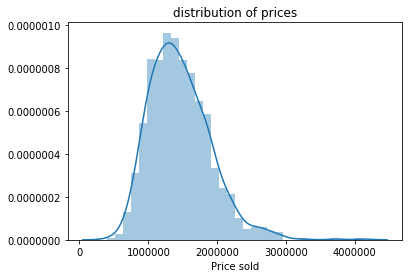

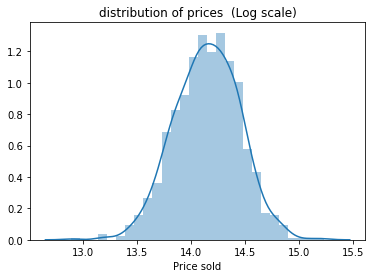

In [10]:
import seaborn as sns
sns.distplot(df['Price sold'])
plt.title('distribution of prices')
plt.show()
sns.distplot(np.log(df['Price sold']))
plt.title('distribution of prices  (Log scale)')
plt.show()

# 3.1

In [11]:
from sklearn.linear_model import LinearRegression
X = df[df.columns[:3]]
y = np.log(df['Price sold'])
reg = LinearRegression().fit(X, y)
df['prediction'] = np.exp(reg.predict(X))
df['error'] = df['prediction']- df['Price sold'] 
df.head(4)

,Square Meters,Floor,Years since renovation,Price sold,prediction,error
0,181,26,7,2121126,2.038451e+06,-82675.202464
1,137,10,9,988448,1.092034e+06,103586.397584
2,125,13,6,1459782,1.289250e+06,-170532.464898
3,155,16,6,1593155,1.580046e+06,-13109.474380


In [16]:
print(F"model explaind variance (R squared) : {np.round(reg.score(X, y),2)}")

model explaind variance (R squared) : 0.89


# 3.2 & 3.3

In [12]:
print("The most overpriced apartment based on the model")
display(df.nlargest(1,'error'))
print("The most underpriced apartment based on the model")
display(df.nsmallest(1,'error'))

The most overpriced apartment based on the model


,Square Meters,Floor,Years since renovation,Price sold,prediction,error
38,171,17,9,869123,1.468712e+06,599589.284677


The most underpriced apartment based on the model


,Square Meters,Floor,Years since renovation,Price sold,prediction,error
630,166,43,5,4117732,2.893617e+06,-1.224115e+06
